<p style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #673AB7;">Car Rental Demand Forcasting</p>


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Table of Contents</span>

1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](#8)

<a id="1"></a> 

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Introduction</span>


La modelación de series de tiempo es una técnica estadística ampliamente utilizada para pronosticar variables que evolucionan a lo largo del tiempo. En el contexto del forecasting de la demanda de alquiler de automóviles, la modelación de series de tiempo se convierte en una herramienta invaluable para ayudar a las empresas de alquiler a anticipar y planificar la demanda futura en función de los datos históricos.

El alquiler de automóviles es una industria altamente dinámica, influenciada por una variedad de factores como las temporadas vacacionales, eventos especiales, tendencias económicas y cambios en las preferencias de los consumidores. Por lo tanto, es crucial contar con un enfoque preciso para pronosticar la demanda de alquiler de automóviles y ajustar las operaciones en consecuencia.

La modelación de series de tiempo permite capturar las tendencias, patrones estacionales y comportamientos cíclicos presentes en los datos históricos de la demanda de alquiler de automóviles. Al analizar estas estructuras subyacentes, los modelos de series de tiempo pueden generar pronósticos que reflejen la evolución pasada y proporcionen estimaciones futuras confiables.

Además, la modelación de series de tiempo es especialmente adecuada para el pronóstico de la demanda de alquiler de automóviles debido a su capacidad para manejar datos univariados y la posibilidad de incorporar componentes exógenas que pueden influir en la demanda, como eventos especiales, festivos o promociones.

Al aplicar técnicas de modelación de series de tiempo, las empresas de alquiler de automóviles pueden obtener pronósticos precisos y oportunos de la demanda futura. Esto les permite optimizar la gestión de su flota de vehículos, establecer políticas de precios adecuadas, planificar la disponibilidad de vehículos y mejorar la satisfacción del cliente al anticipar y satisfacer sus necesidades de manera más eficiente.

En resumen, la modelación de series de tiempo es una herramienta esencial para el forecasting de la demanda de alquiler de automóviles. Al aprovechar los patrones y tendencias presentes en los datos históricos, los modelos de series de tiempo permiten a las empresas de alquiler anticipar la demanda futura y tomar decisiones informadas para optimizar sus operaciones y satisfacer las necesidades de sus clientes de manera efectiva.

<a id="2"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Case study</span>

Caso de estudio: Modelación de series de tiempo para el forecasting de la demanda de alquiler de automóviles

En este caso de estudio, abordaremos la aplicación de la modelación de series de tiempo para el forecasting de la demanda de alquiler de automóviles. Imaginemos una empresa de alquiler de automóviles que busca mejorar su capacidad para pronosticar la demanda futura y optimizar sus operaciones en función de esos pronósticos. Utilizaremos datos históricos de alquiler de automóviles para construir y evaluar diferentes modelos de series de tiempo, y finalmente, seleccionaremos el modelo más adecuado para el pronóstico de la demanda.

    Paso 1: Recopilación y exploración de datos
    Paso 2: Preprocesamiento de datos
    Paso 3: Selección y ajuste del modelo
    Paso 4: Validación y selección del modelo óptimo
    Paso 5: Generación de pronósticos y toma de decisiones

La modelación de series de tiempo ofrece a las empresas de alquiler de automóviles una forma eficaz de pronosticar la demanda futura y mejorar sus operaciones. Al aplicar técnicas adecuadas de modelación de series de tiempo, las empresas pueden anticipar las fluctuaciones de la demanda, evitar problemas de exceso o escasez de vehículos y mejorar la satisfacción del cliente al proporcionar un servicio más eficiente y confiable. Es importante destacar que la modelación de series de tiempo es un proceso iterativo, y se recomienda realizar actualizaciones regulares del modelo a medida que se disponga de nuevos datos para mejorar continuamente la precisión del pronóstico.

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Importing Libraries</span>


In [2]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

from statsmodels.tsa.stattools import adfuller

# Time
# ==============================================================================
from datetime import datetime, date
from datetime import timedelta
import datetime as dt # working with time data

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [4]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from IPython.core.display import HTML,display
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#99FFDE',  # #212946  '#99FFDE', '#ffde99', '#de99ff' # #212946  '#99FFDE', '#ffde99', '#de99ff'  'coral','#FFDAB9','yellowgreen','#6495ED'
    'axes.facecolor': '#99FFDE',
    'savefig.facecolor': '#99FFDE',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'black',  #2A3459
    'grid.linewidth': '1',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Importing Data</span>

El conjunto de datos contiene datos sobre la demanda de alquiler de coches en una ciudad de Bangalore.

columnas:

* fecha: fecha en formato dd/mm/aaaa.
* hora: hora del día.
* demanda: demanda de automóviles para esa hora de ese dia.

In [63]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/car_rental_demand_forecasting_train.csv",parse_dates=["date"])

df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In this case we are going to use pm2_5 as the target variable.

In [4]:
df["unique_id"]="1"
df=df.rename(columns={"date": "ds", "demand": "y"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         18247 non-null  datetime64[ns]
 1   hour       18247 non-null  int64         
 2   y          18247 non-null  int64         
 3   unique_id  18247 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 570.3+ KB


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 210px">Visualizing the Training Data</span>


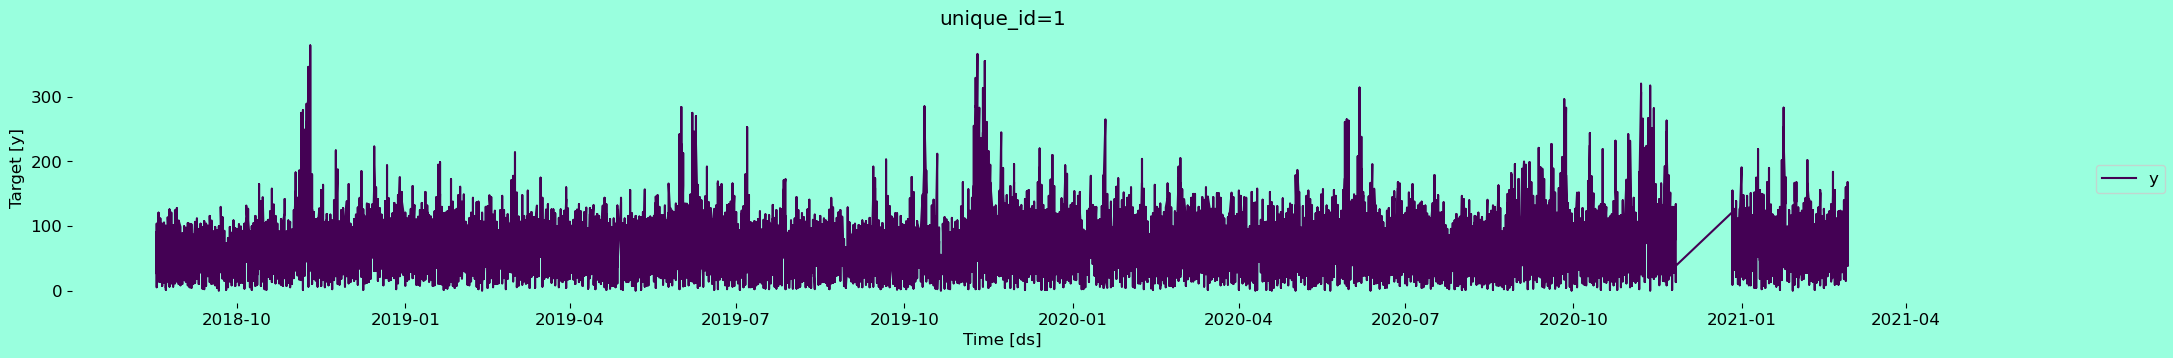

In [6]:
plot_series(df)

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">One year Training Data</span>


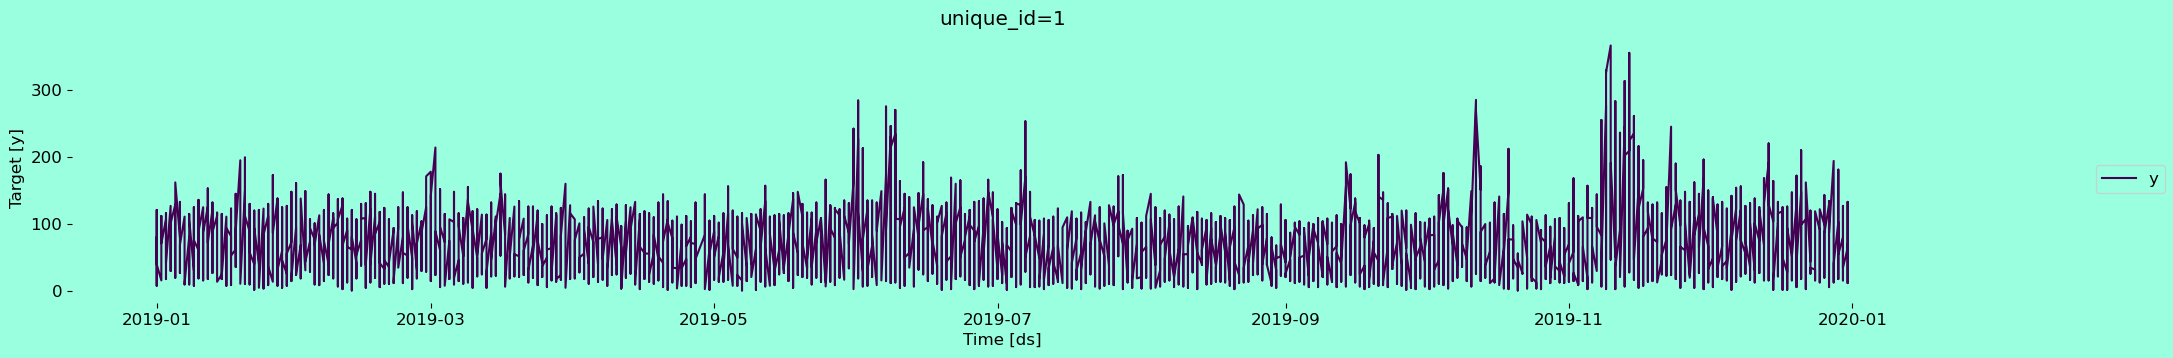

In [7]:
one_year_df=df.loc[(df.ds >=pd.to_datetime('2019-01-01')) & (df.ds<pd.to_datetime('2020-01-01'))]
plot_series(one_year_df)

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">One month Training Data</span>


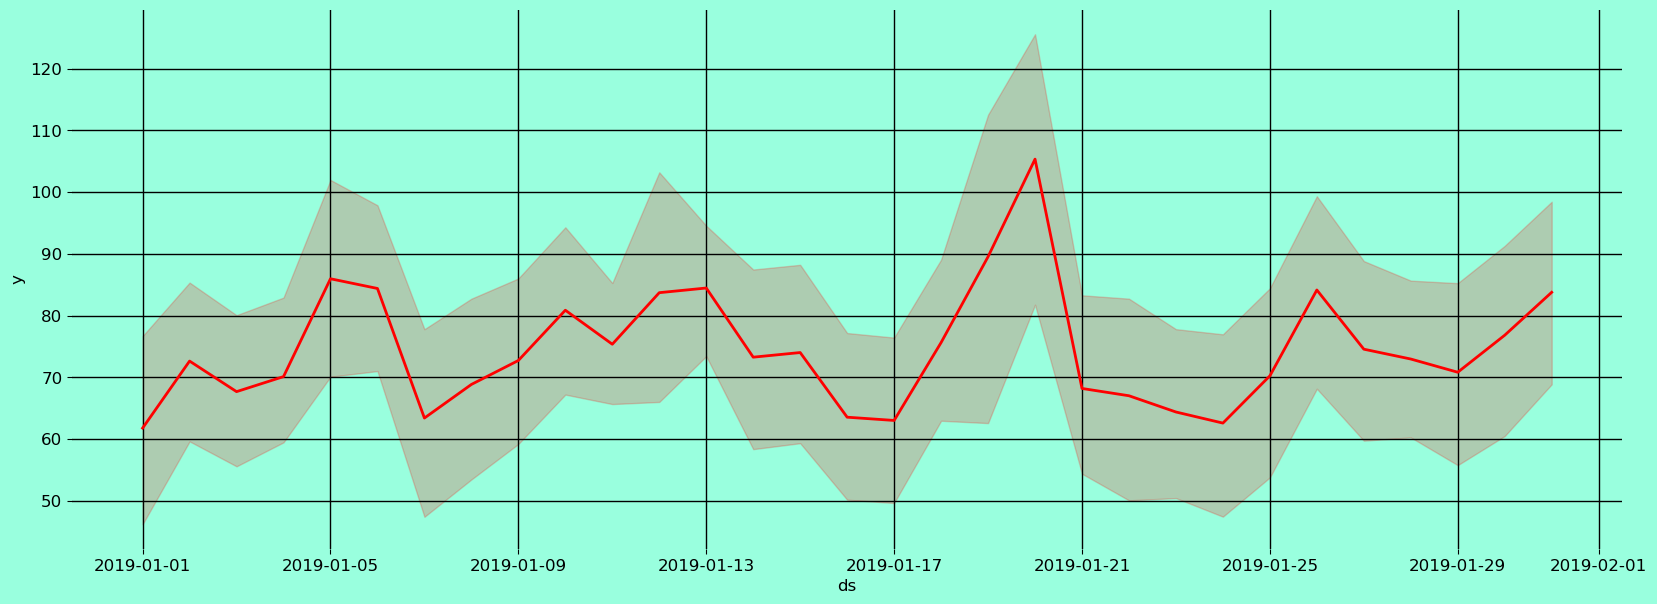

In [8]:
one_month_df=df.loc[(df.ds >=pd.to_datetime('2019-01-01')) & (df.ds<pd.to_datetime('2019-02-01'))]
plt.figure(figsize=(20,7))
sns.lineplot(data=one_month_df,x='ds',y='y',lw=2,color='red');

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Two month Training Data</span>

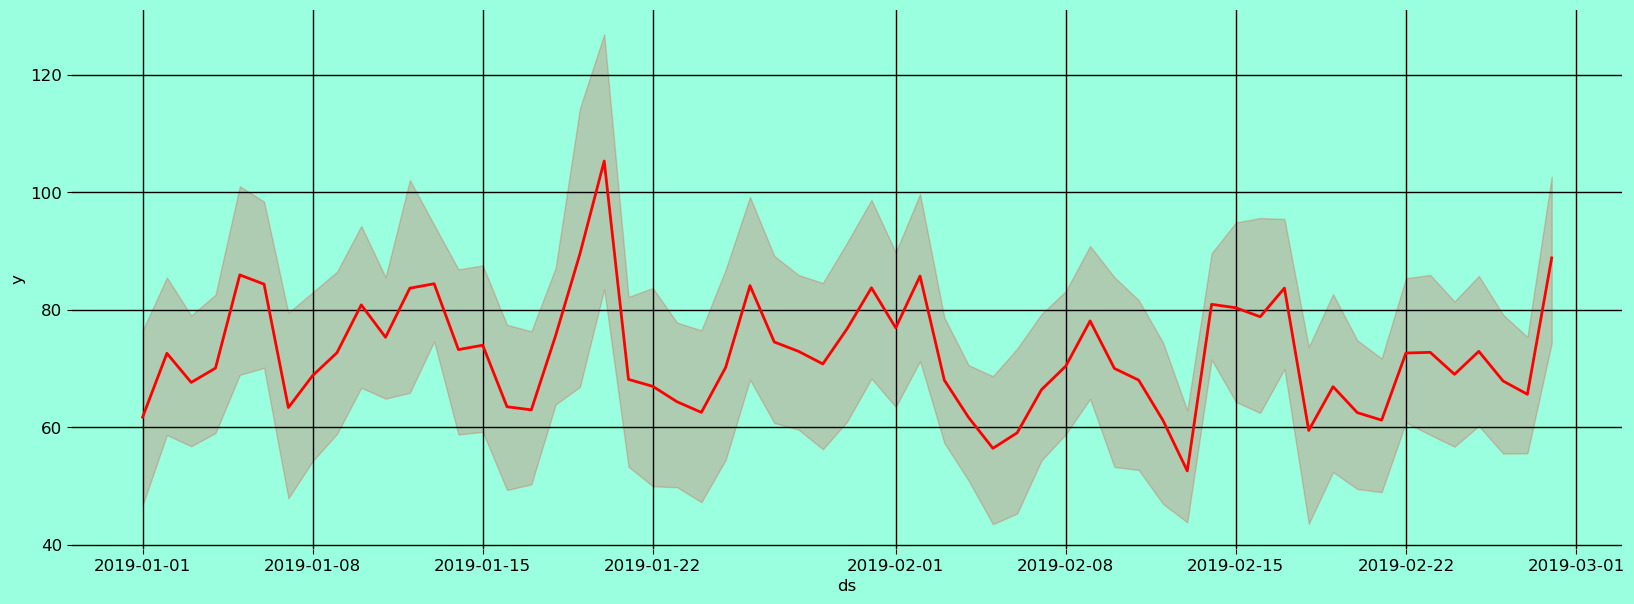

In [9]:
two_month_df=df.loc[(df.ds >=pd.to_datetime('2019-01-01')) & (df.ds<pd.to_datetime('2019-03-01'))]
plt.figure(figsize=(20,7))
sns.lineplot(data=two_month_df,x='ds',y='y',lw=2,color='red');

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">One day Training Data</span>

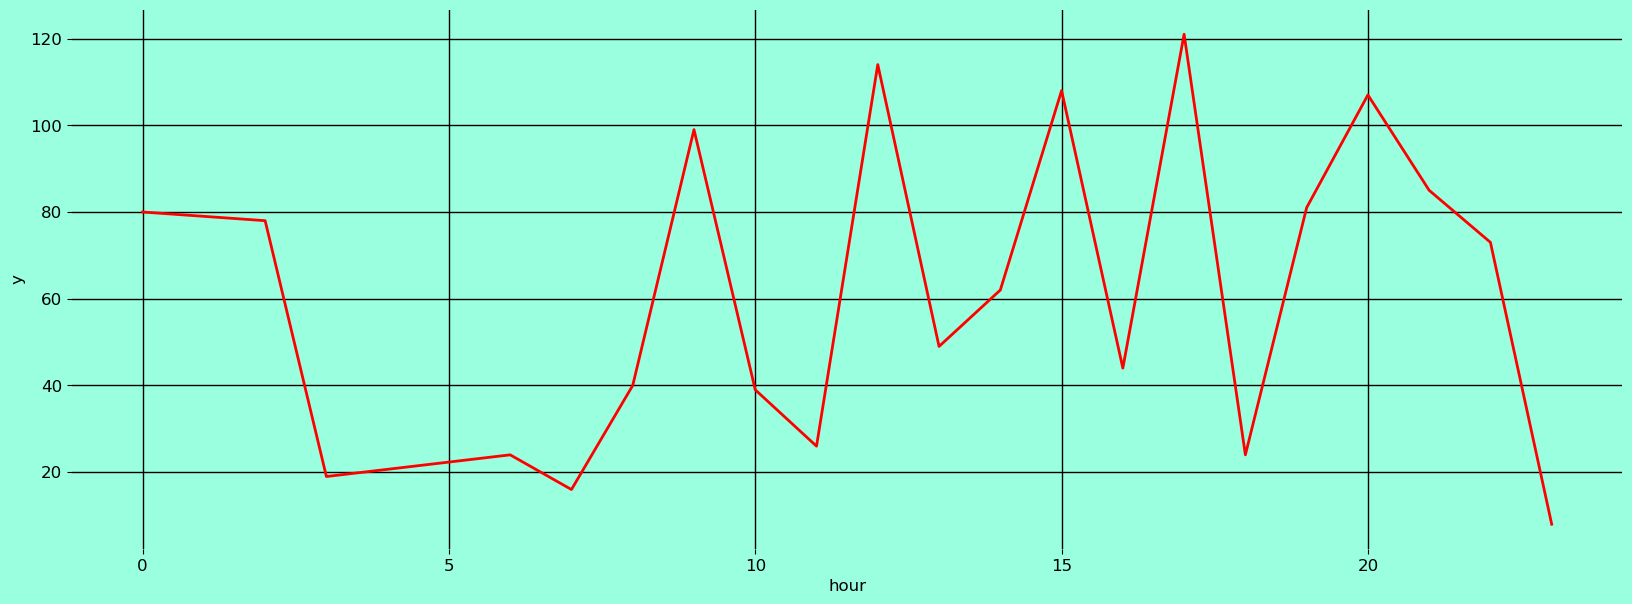

In [10]:
one_day_df=df.loc[(df.ds >=pd.to_datetime('2019-01-01')) & (df.ds<pd.to_datetime('2019-01-02'))]
plt.figure(figsize=(20,7))
sns.lineplot(data=one_day_df,x='hour',y='y',lw=2,color='red');

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 210px">Feature Engineering</span>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Decomposing Date Features</span>

In [11]:
# decompose date 
df['year']=df['ds'].dt.year
df['month']=df['ds'].dt.month
df['day'] = df['ds'].dt.day
df['week_of_year']=(df['ds'].dt.isocalendar().week).astype(int)
df['day_of_week']=df['ds'].dt.weekday
df['quartor']=df['ds'].dt.quarter
df['isWeekend'] = df['day_of_week'].apply(lambda x:1 if x>4 else 0)

In [12]:
#function to identify the timing of the day
def timeOfDay(n):
    if n in range(1,4):
        return 'Late Night'
    elif n in range(4,7):
        return 'Early Morning'
    elif n in range(7,12):
        return 'Morning'
    elif n in range(12,15):
        return 'Afternoon'
    elif n in range(15,18):
        return 'Evening'
    elif n in range(18,25) or n == 0:
        return 'Night'

In [13]:
df['typeOfDay'] = df['hour'].apply(lambda x: timeOfDay(x))

In [14]:
#function for converting the months to seasons
def monthToSeasons(x):
    if x in[9,10,11]:
        return 'Spring'
    elif x in [12,1,2]:
        return 'Summer'
    elif x in [3,4,5]:
        return 'Autumn'
    elif x in [6,7,8]:
        return 'Winter'

In [15]:
df['Season'] = df['month'].apply(monthToSeasons)

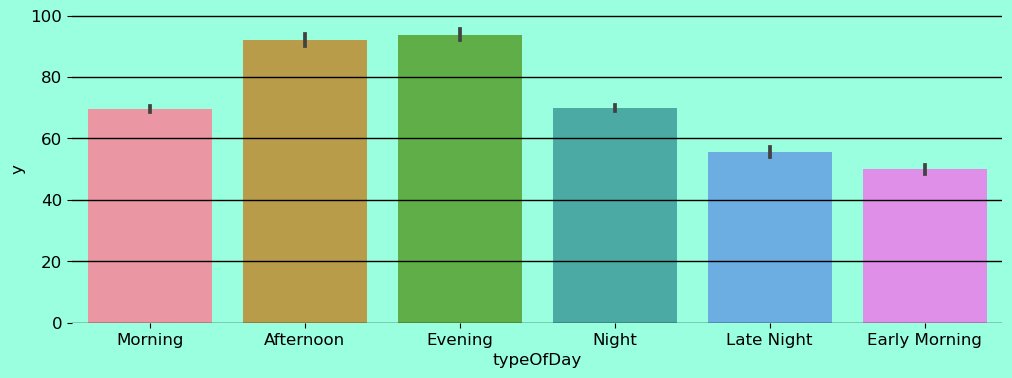

In [16]:
#Type of Day vs Demand

plt.figure(figsize=(12,4))
sns.barplot(x=df['typeOfDay'], y=df['y']);

We can see the demand was higher during Afternoon and Evening

<Axes: xlabel='Season', ylabel='y'>

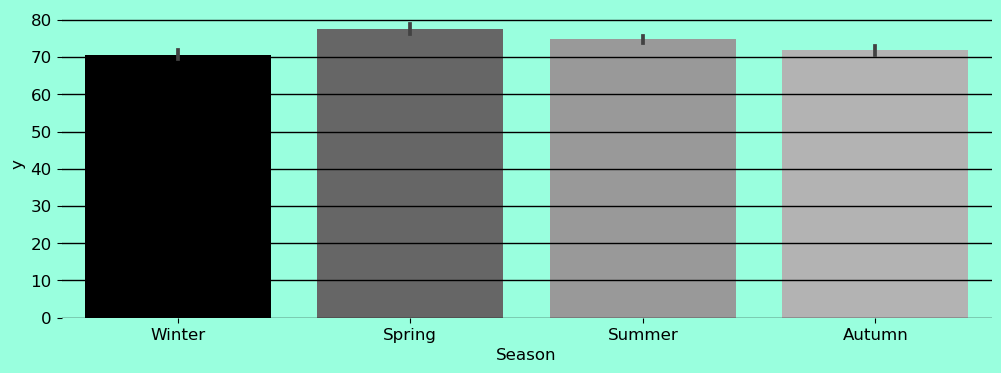

In [17]:
#Season vs Demand 

plt.figure(figsize=(12,4))
sns.barplot(x=df['Season'], y=df['y'])

It is evident from the graph that the demand was higher during the Spring season

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Grouping Demand by months</span>

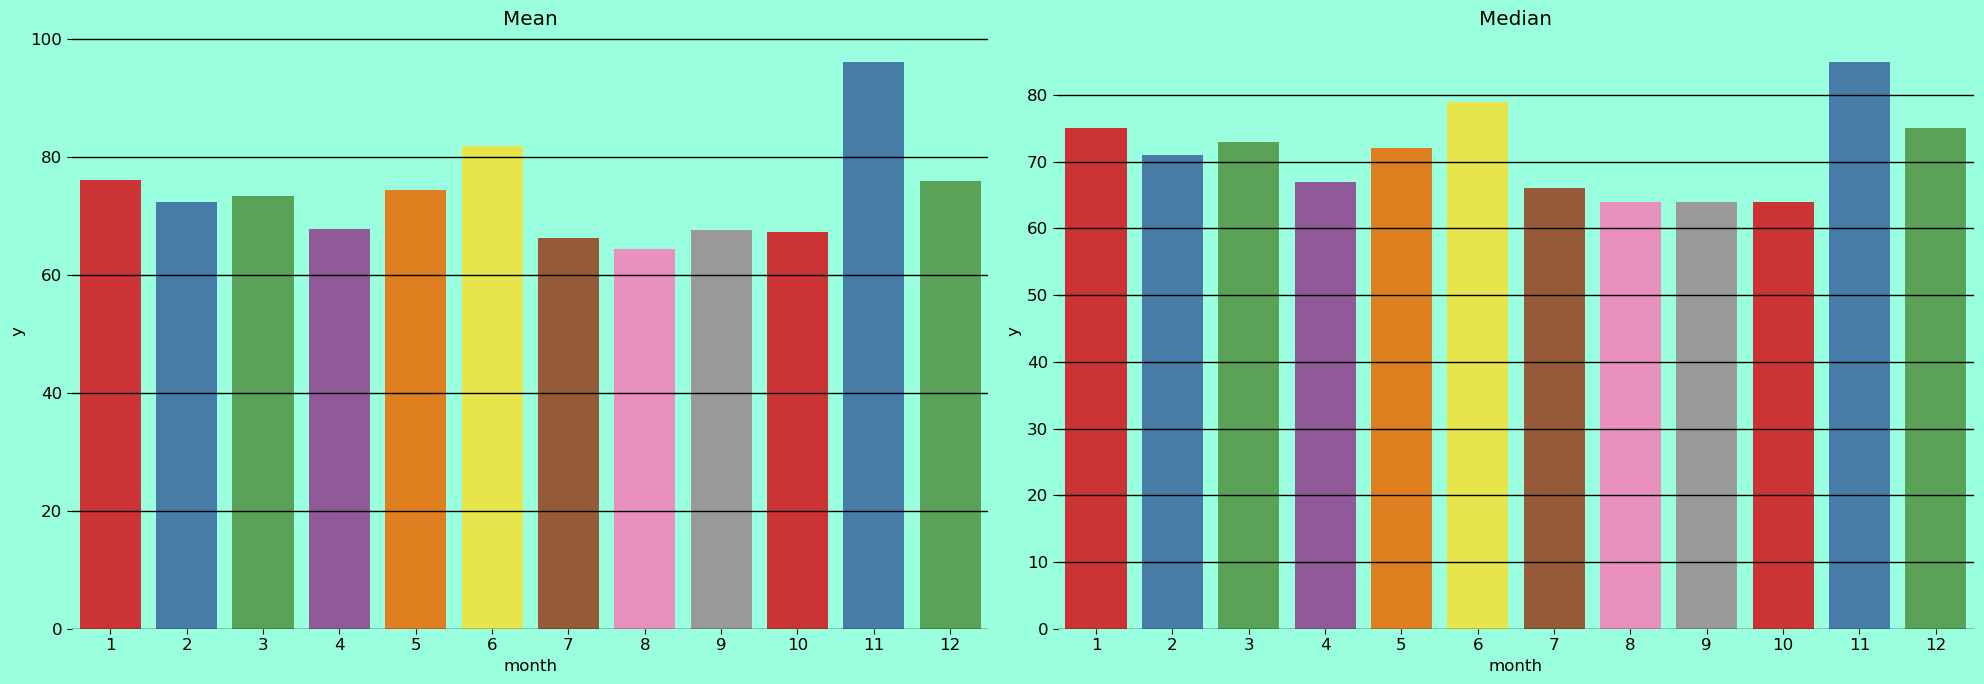

In [18]:
plt.figure(figsize=(20,7))
temp1=df.groupby('month')['y'].mean().reset_index()
temp2=df.groupby('month')['y'].median().reset_index()
plt.subplot(1,2,1)
sns.barplot(data=temp1,x='month',y='y',palette='Set1')
plt.title("Mean")
plt.subplot(1,2,2)
sns.barplot(data=temp2,x='month',y='y',palette='Set1');
plt.title("Median")
plt.tight_layout()

The month of November has higher demand as compared to other months of the year.

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Adding is_november feature</span>

In [19]:
df['is_november']=(df['month']==11).astype(int)


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Grouping Demand by hour</span>

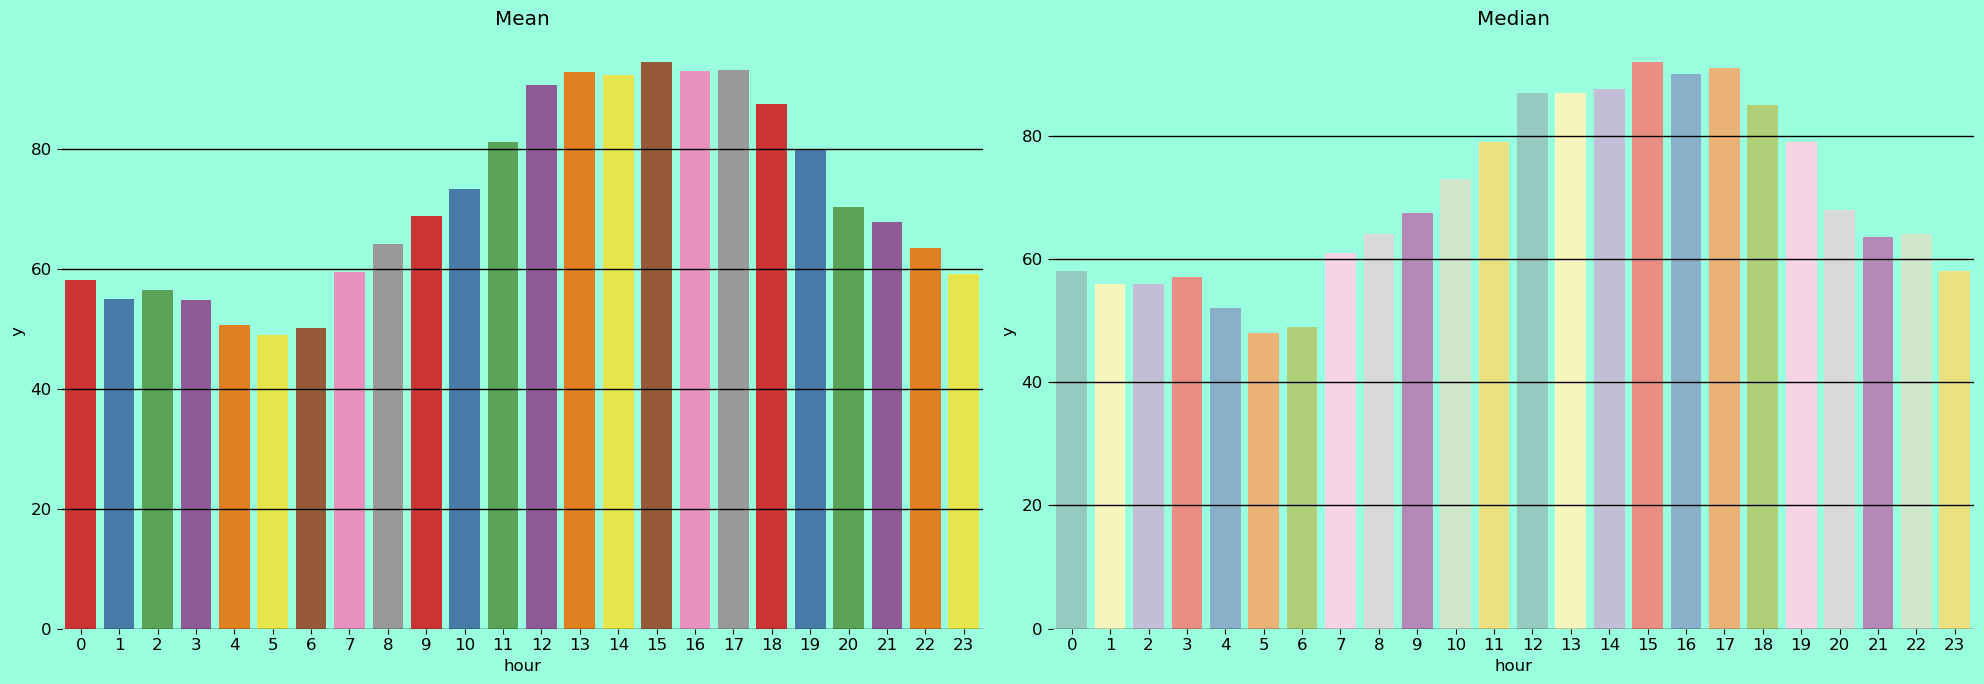

In [20]:
plt.figure(figsize=(20,7))
temp1=df.groupby('hour')['y'].mean().reset_index()
temp2=df.groupby('hour')['y'].median().reset_index()
plt.subplot(1,2,1)
sns.barplot(data=temp1,x='hour',y='y',palette='Set1')
plt.title("Mean")
plt.subplot(1,2,2)
sns.barplot(data=temp2,x='hour',y='y',palette='Set3');
plt.title("Median")
plt.tight_layout()


We can observe that hours from 7 to 22 have higher demand as compared to the other hours of the day.


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Adding peak_hours feature</span>

In [21]:
df['peak_hours'] = ((df['hour']>=7 ) &  (df['hour']<=22)).astype(int)


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Grouping Demand by year</span>

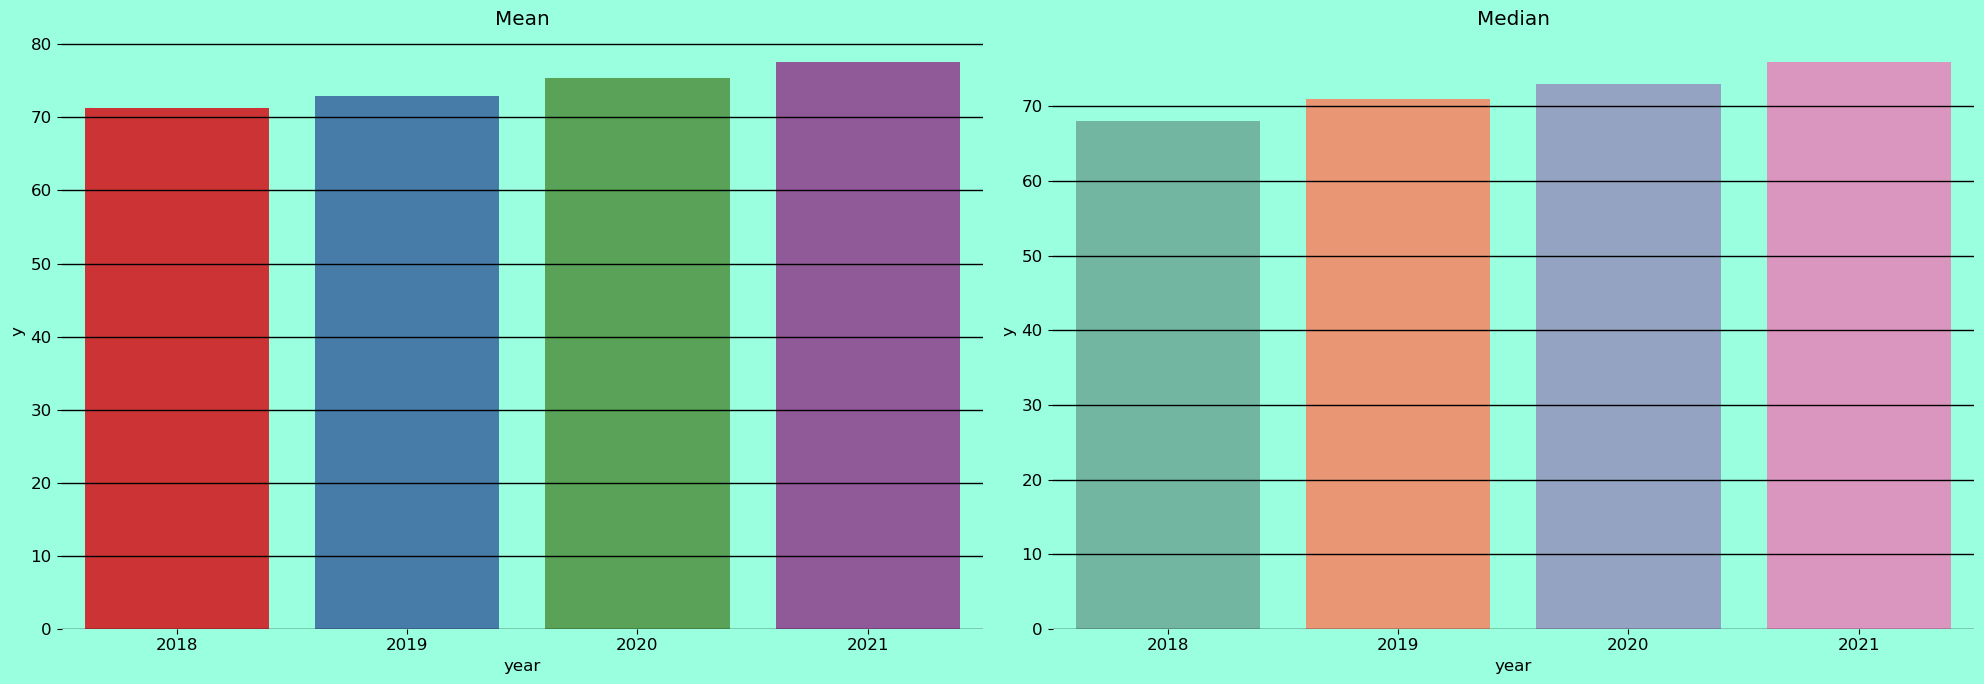

In [22]:
plt.figure(figsize=(20,7))
temp1=df.groupby('year')['y'].mean().reset_index()
temp2=df.groupby('year')['y'].median().reset_index()
plt.subplot(1,2,1)
sns.barplot(data=temp1,x='year',y='y',palette='Set1')
plt.title("Mean")
plt.subplot(1,2,2)
sns.barplot(data=temp2,x='year',y='y',palette='Set2');
plt.title("Median")
plt.tight_layout()

- We can observe that as demand goes on increasing every year
- I will define a feature year_code to measure the number of years from beginning.


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Adding year_code featrue</span>

In [23]:
df['year_code']=df.year-2017

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Grouping Demand by quartor</span>

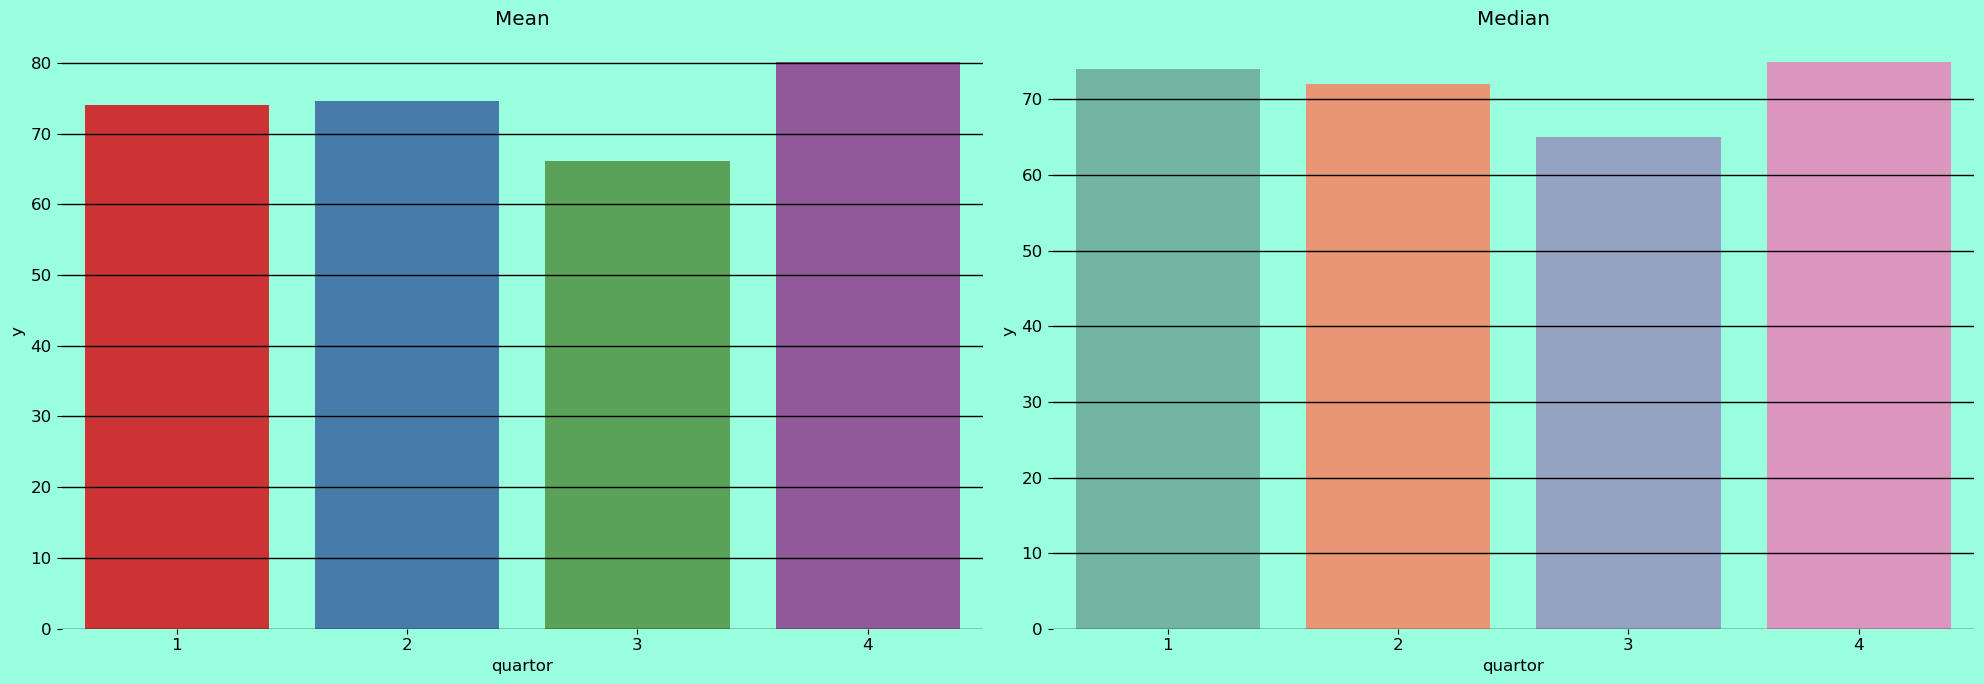

In [24]:
plt.figure(figsize=(20,7))
temp1=df.groupby('quartor')['y'].mean().reset_index()
temp2=df.groupby('quartor')['y'].median().reset_index()
plt.subplot(1,2,1)
sns.barplot(data=temp1,x='quartor',y='y',palette='Set1')
plt.title("Mean")
plt.subplot(1,2,2)
sns.barplot(data=temp2,x='quartor',y='y',palette='Set2');
plt.title("Median")
plt.tight_layout()

- We can observe that quartor 3 has lower demand as compared to other quartors of the year.

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Adding is_quartor_three feature</span>

In [25]:
df['is_quartor_three'] = (df['quartor']==3).astype(int)


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Grouping Demand by week of the year</span>


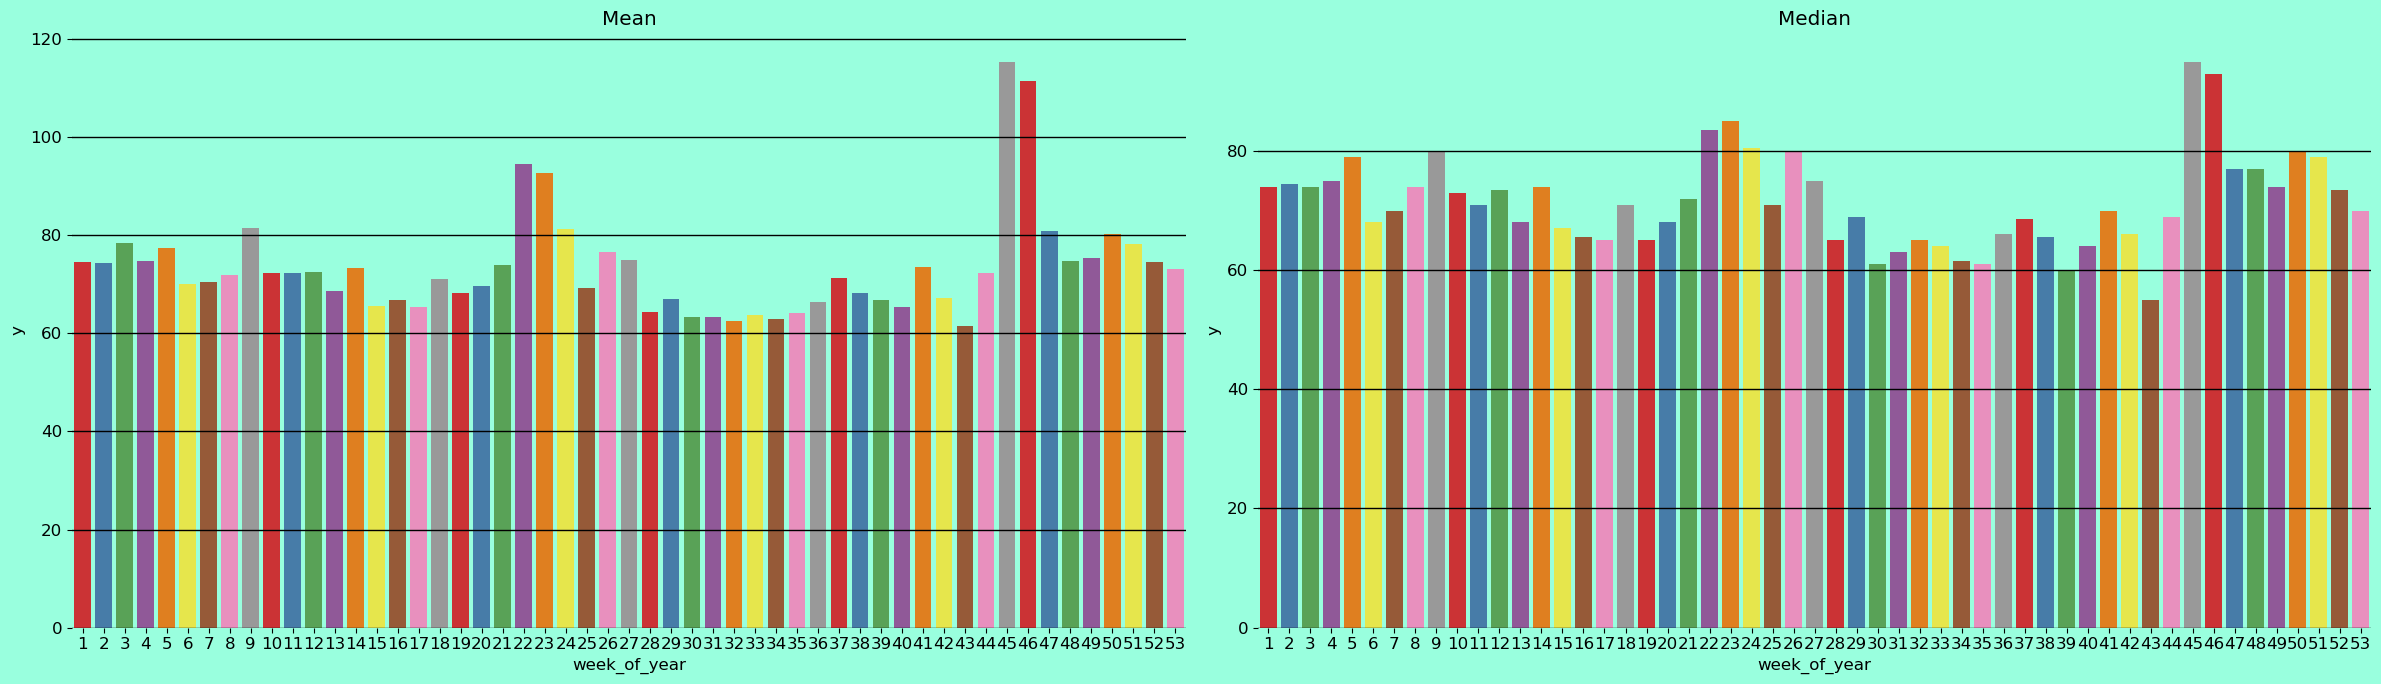

In [26]:
plt.figure(figsize=(24,7))
temp1=df.groupby('week_of_year')['y'].mean().reset_index()
temp2=df.groupby('week_of_year')['y'].median().reset_index()
plt.subplot(1,2,1)
sns.barplot(data=temp1,x='week_of_year',y='y',palette='Set1')
plt.title("Mean")
plt.subplot(1,2,2)
sns.barplot(data=temp2,x='week_of_year',y='y',palette='Set1');
plt.title("Median")
plt.tight_layout()

- We can observe that there is one major spike for two weeks(45,46).
- But I have already considered this when I added the is_november feature.


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Grouping Demand by day of the week</span>

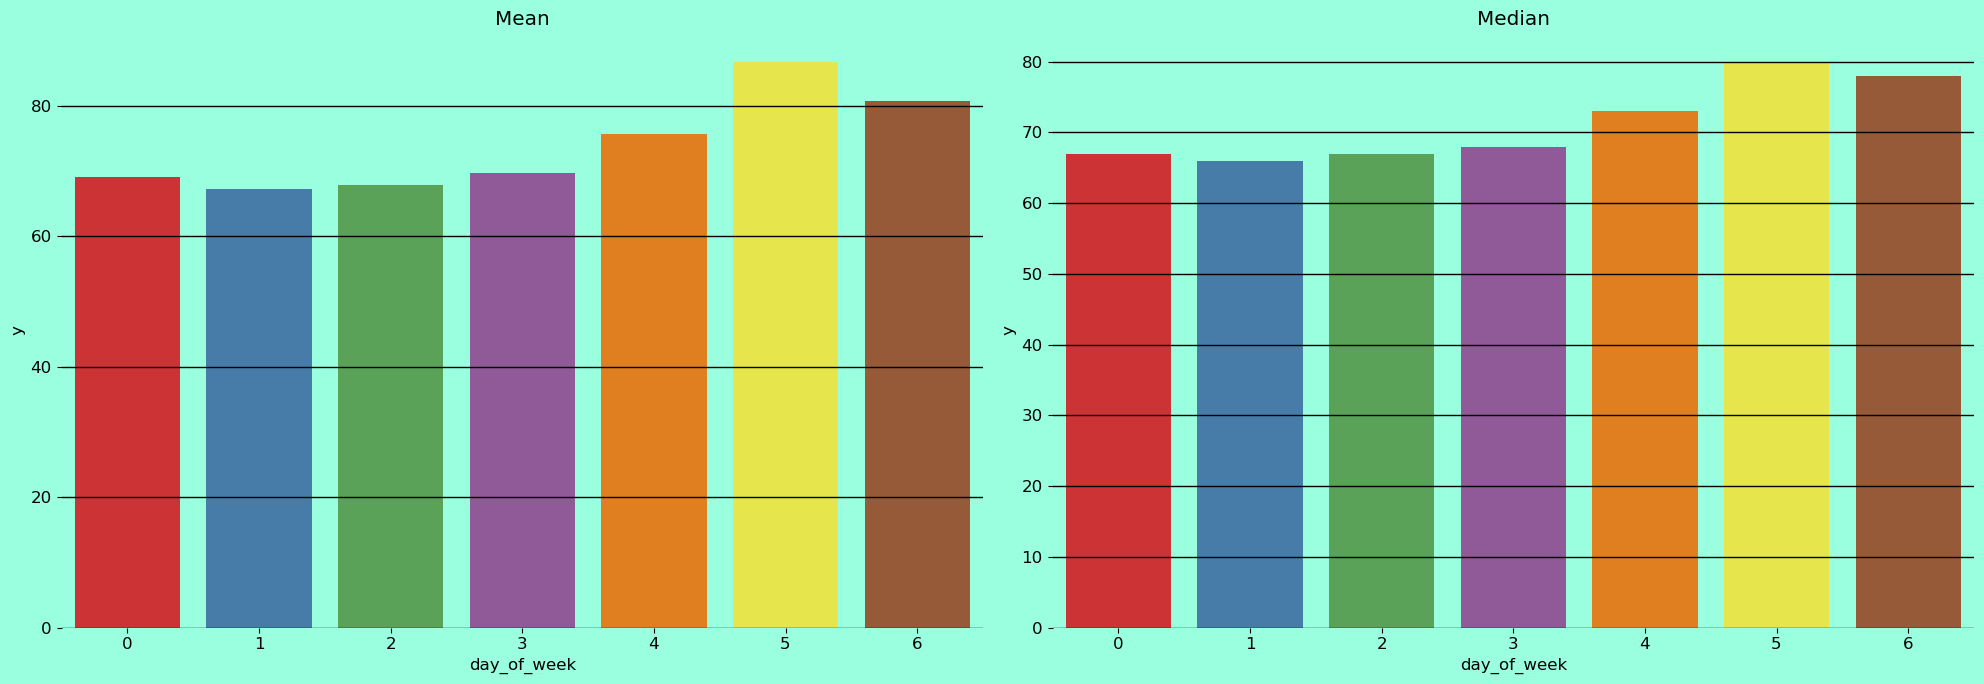

In [27]:
plt.figure(figsize=(20,7))
temp1=df.groupby('day_of_week')['y'].mean().reset_index()
temp2=df.groupby('day_of_week')['y'].median().reset_index()
plt.subplot(1,2,1)
sns.barplot(data=temp1,x='day_of_week',y='y',palette='Set1')
plt.title("Mean")
plt.subplot(1,2,2)
sns.barplot(data=temp2,x='day_of_week',y='y',palette='Set1');
plt.title("Median")
plt.tight_layout()

- We can observe that the weekend days (Friday,Saturday,Sunday) have high demand.
- Since there are only 7 categories, there is not need to additionally add any feature as the model will figure this out pretty easily.


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Grouping Demand by day of the month</span>


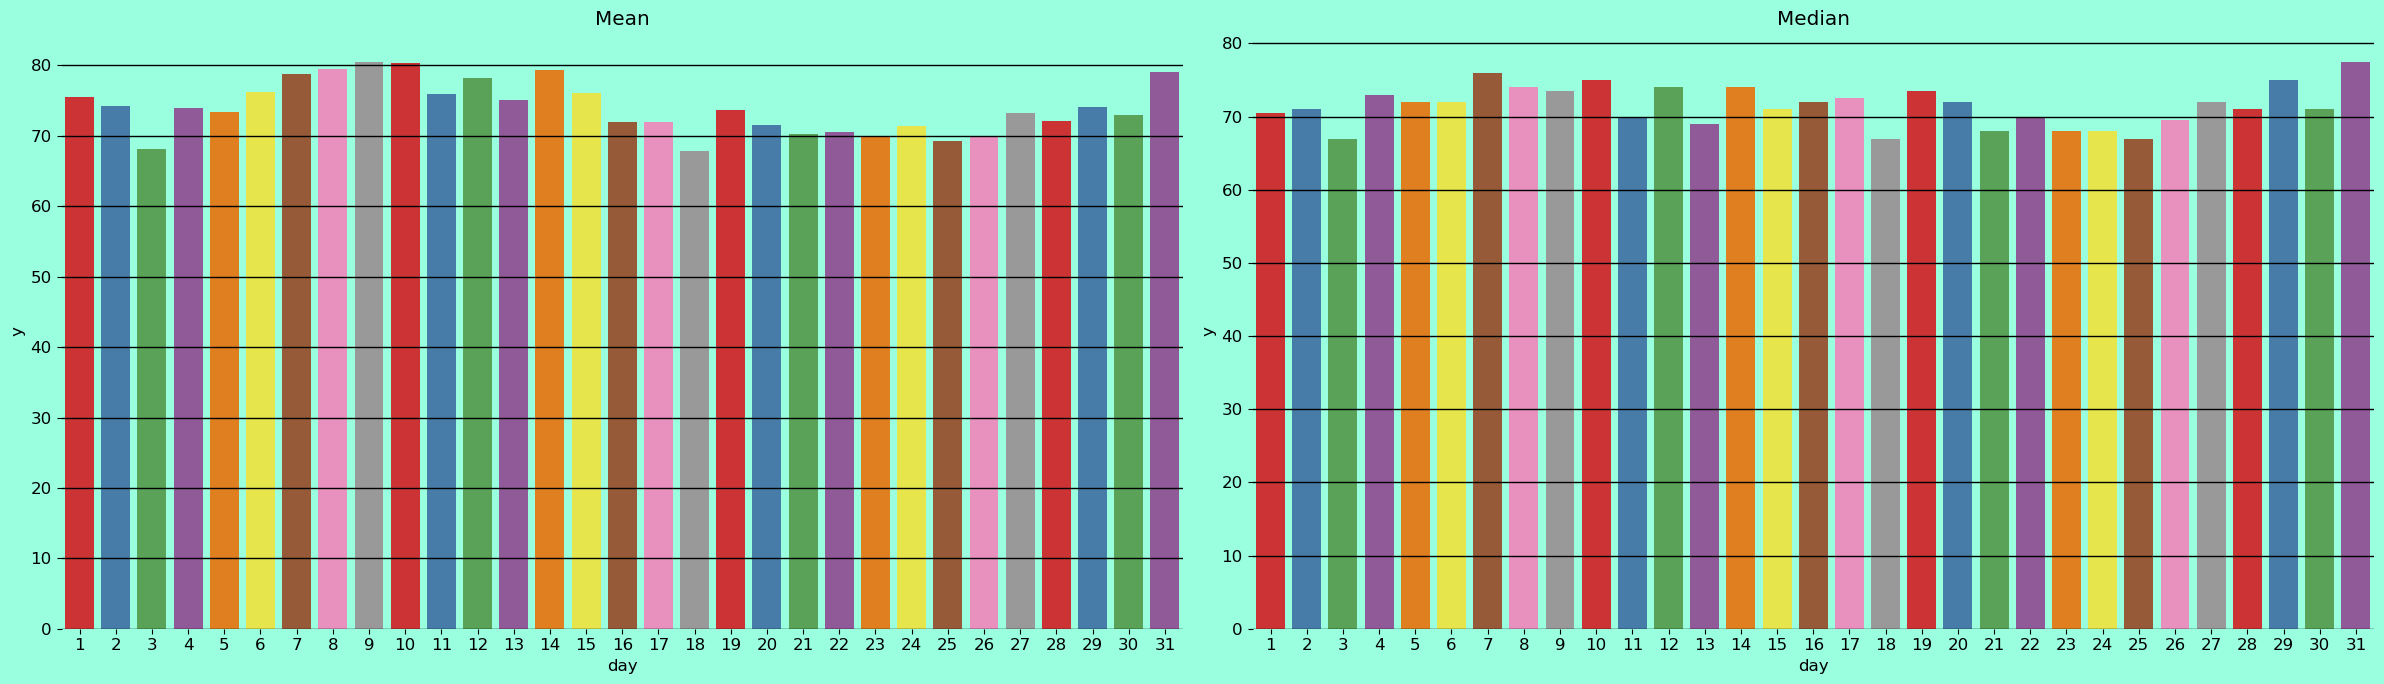

In [28]:
plt.figure(figsize=(24,7))
temp1=df.groupby('day')['y'].mean().reset_index()
temp2=df.groupby('day')['y'].median().reset_index()
plt.subplot(1,2,1)
sns.barplot(data=temp1,x='day',y='y',palette='Set1')
plt.title("Mean")
plt.subplot(1,2,2)
sns.barplot(data=temp2,x='day',y='y',palette='Set1');
plt.title("Median")
plt.tight_layout()

No specific trend observed.

<a id="4"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Split the data into training and testing</span>

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [ ]:
#df["ds"]=df['ds'] + pd.to_timedelta(df['hour'], unit='h')


In [31]:
data=df.groupby("ds")[["y"]].sum().reset_index().sort_values("ds")
data["unique_id"]="1"
data

,ds,y,unique_id
0,2018-08-18,632,1
1,2018-08-19,1040,1
2,2018-08-20,835,1
3,2018-08-21,932,1
4,2018-08-22,944,1
...,...,...,...
890,2021-02-24,1659,1
891,2021-02-25,1417,1
892,2021-02-26,1812,1
893,2021-02-27,2165,1


In [32]:
df1=data[["ds","y","unique_id"]]
train = df1[df1.ds<='2020-09-01'] 
test=df1[(df1['ds'] > '2020-09-01')]

train.shape, test.shape

((745, 3), (150, 3))

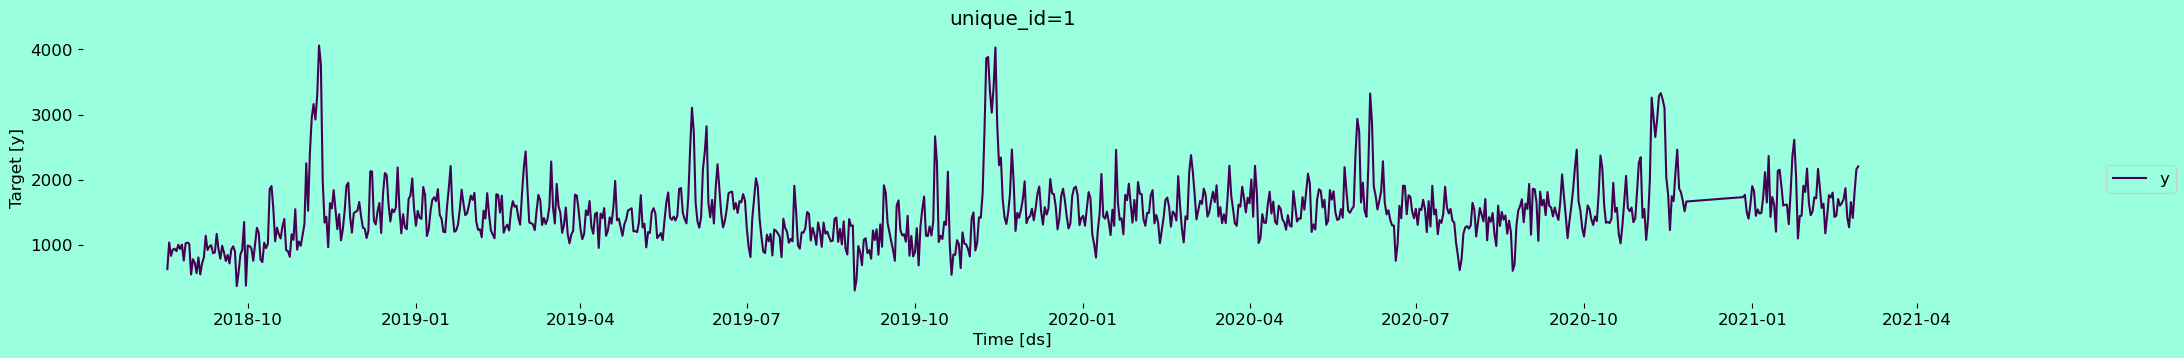

In [33]:
plot_series(train, test)

<a id="5"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Implementation with StatsForecast</span>


We are going to train the `AutoARIMA, MSTL` model, using the `AutoARIMA, MSTL` function. This model will help us forecast user demand in the next 150 daily.

In [1]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA,  SeasonalNaive,  MSTL, AutoETS,AutoCES, AutoTheta, SeasonalExponentialSmoothingOptimized,Holt, HoltWinters

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [35]:
season_length = 7 # monthly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          AutoCES(season_length=season_length),
          AutoTheta(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          SeasonalExponentialSmoothingOptimized(season_length=season_length),
          HoltWinters(season_length=season_length, error_type='A', alias='Hws_add'),
          HoltWinters(season_length=season_length, error_type='M', alias='Hws_mul'),
          Holt(season_length=season_length, error_type="A", alias="Holt_Add"),
          Holt(season_length=season_length, error_type="M", alias="Holt_Multi"),
          MSTL(
              season_length=[7, 365], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]

In [36]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='D', 
    n_jobs=-1)

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Fit the Model</span>

In [37]:
sf.fit()

StatsForecast(models=[AutoARIMA,AutoETS,CES,AutoTheta,SeasonalNaive,SeasESOpt,Hws_add,Hws_mul,Holt_Add,Holt_Multi,MSTL])

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Predict Method</span>

In [38]:
Y_hat = sf.predict(horizon)

Y_hat

,ds,AutoARIMA,AutoETS,CES,AutoTheta,SeasonalNaive,SeasESOpt,Hws_add,Hws_mul,Holt_Add,Holt_Multi,MSTL
unique_id,,,,,,,,,,,,
1,2020-09-02,1784.946289,1680.892944,1768.864014,1786.575928,1530.0,1482.084717,1791.716675,1681.876831,1877.407471,1855.297974,1527.881958
1,2020-09-03,1643.873657,1597.127930,1563.991699,1757.238525,1596.0,1368.897705,1759.468872,1598.458618,1878.881958,1887.208008,1369.658691
1,2020-09-04,1609.685913,1762.783203,1782.249390,1952.893188,1702.0,1448.657837,1911.808228,1765.007080,1880.356445,1919.117920,1286.528320
1,2020-09-05,1483.272217,1971.147339,1963.330811,2210.399414,1351.0,1416.959229,2110.178467,1974.685669,1881.830933,1951.027954,1306.990112
1,2020-09-06,1444.315796,1862.252319,1881.239136,2228.900391,1635.0,1274.832886,2043.579834,1866.625854,1883.305420,1982.937988,612.397888
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2021-01-25,1462.279419,1709.995972,1669.533325,1937.094604,1555.0,1310.076172,1925.165161,1888.637085,2091.208496,6482.247559,1560.677734
1,2021-01-26,1462.279419,1678.848755,1604.015259,1790.607178,1938.0,1478.987305,1862.417969,1856.355835,2092.683105,6514.157715,1855.922485
1,2021-01-27,1462.279419,1680.892944,1614.614746,1812.531616,1530.0,1482.084717,1868.260498,1859.739868,2094.157471,6546.067871,1869.740234


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Forecasting Plot</span>

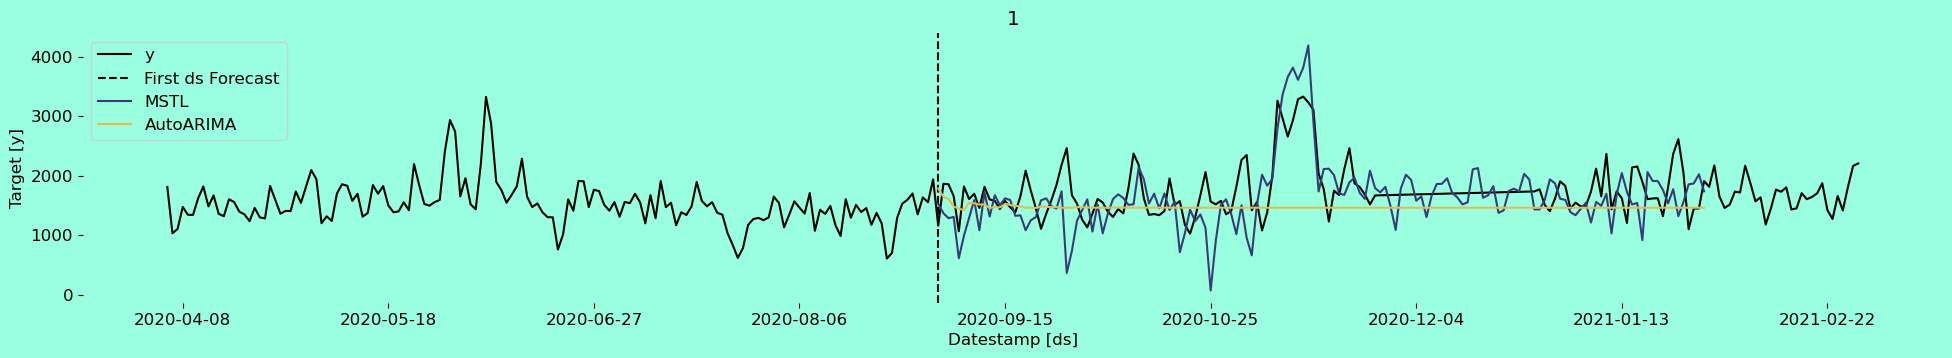

In [40]:
StatsForecast.plot(df1, Y_hat, max_insample_length=300, models=["MSTL","AutoARIMA"])

<a id="6"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Evaluate the model</span>

In [41]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [42]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [43]:
print(evaluate_performace(train , test ,
                          Y_hat ,models=['AutoARIMA', 'AutoETS', 'CES', 'AutoTheta', 'SeasonalNaive',
       'SeasESOpt', 'Hws_add', 'Hws_mul', 'Holt_Add', 'Holt_Multi', 'MSTL']))

               mase          mae        mape         rmse      smape
AutoARIMA       NaN   376.707677   14.835633   566.453540  16.759740
AutoETS         NaN   311.982571   14.070391   448.402757  13.712725
CES             NaN   295.811605   12.697047   451.998130  12.865988
AutoTheta       NaN   381.715033   18.851909   482.122065  16.758559
SeasonalNaive   NaN   396.508333   16.947382   563.841874  17.622128
SeasESOpt       NaN   428.377736   16.913934   614.745487  19.654428
Hws_add         NaN   378.055609   18.577098   474.327809  16.693340
Hws_mul         NaN   331.242590   15.661153   449.489675  14.636085
Holt_Add        NaN   448.652090   22.408206   532.482439  19.580800
Holt_Multi      NaN  2273.252858  113.034480  2713.826325  58.475786
MSTL            NaN   415.484550   19.120735   538.133094  21.066604


<a id="7"></a>


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Exogenous variables</span>

We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

## **Generating data with Mlforecast**

We are going to use the `MLforcast` function to generate residual variables, for this we are going to use two parameters:
1. The `lags` of 1,7 and 14
2. The `lag_transforms`:
     - expanding_mean: we use it to identify trends and to smooth out fluctuations in our time series.
     - rolling_mean: we use it to identify trends and to smooth out fluctuations in our time series.

In [45]:
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from mlforecast import MLForecast

from statsforecast.models import  AutoARIMA, SeasonalNaive

In [46]:
season_length = 7 # Daily data 

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          MSTL(
              season_length=[7, 365], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() ) ]# model used to forecast trend 

In [47]:
mlf = MLForecast(models=models,
                 freq='D', 
                 lags=[1,7,14],
                 lag_transforms={1: [expanding_mean], 12: [(rolling_mean, 7)] }       
                 )

Now let's visualize the data we have generated using `MLForecast`.

In [48]:
prep = mlf.preprocess(data)
prep

,ds,y,unique_id,lag1,lag7,lag14,expanding_mean_lag1,rolling_mean_lag12_window_size7
18,2018-09-05,551.0,1,811.0,1040.0,944.0,863.611084,899.428589
19,2018-09-06,719.0,1,551.0,1021.0,907.0,847.157898,943.571411
20,2018-09-07,811.0,1,719.0,550.0,1006.0,840.750000,939.000000
21,2018-09-08,1144.0,1,811.0,784.0,941.0,839.333313,928.857117
22,2018-09-09,925.0,1,1144.0,731.0,1008.0,853.181824,942.571411
...,...,...,...,...,...,...,...,...
890,2021-02-24,1659.0,1,1273.0,1707.0,1180.0,1506.586548,1664.285767
891,2021-02-25,1417.0,1,1659.0,1605.0,1448.0,1506.757568,1601.857178
892,2021-02-26,1812.0,1,1417.0,1644.0,1767.0,1506.656982,1591.000000
893,2021-02-27,2165.0,1,1812.0,1704.0,1731.0,1506.998901,1571.428589


In [49]:
prep.drop(columns=['unique_id', 'ds']).corr()['y']

y                                  1.000000
lag1                               0.717297
lag7                               0.402682
lag14                              0.259732
expanding_mean_lag1                0.230187
rolling_mean_lag12_window_size7    0.167381
Name: y, dtype: float64

<a id="8"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Splitting training and test data with exogenous variables</span>

Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 60 daily to test and evaluate the performance of our model.

In [50]:
exogen=prep[['ds', 'unique_id', 'lag1', 'lag7','lag14', 'expanding_mean_lag1','rolling_mean_lag12_window_size7']]

In [51]:
train_exo = prep[prep.ds<='2020-09-01'] 
test_exo=exogen[(exogen['ds'] > '2020-09-01')]

train_exo.shape, test_exo.shape

((727, 8), (150, 7))

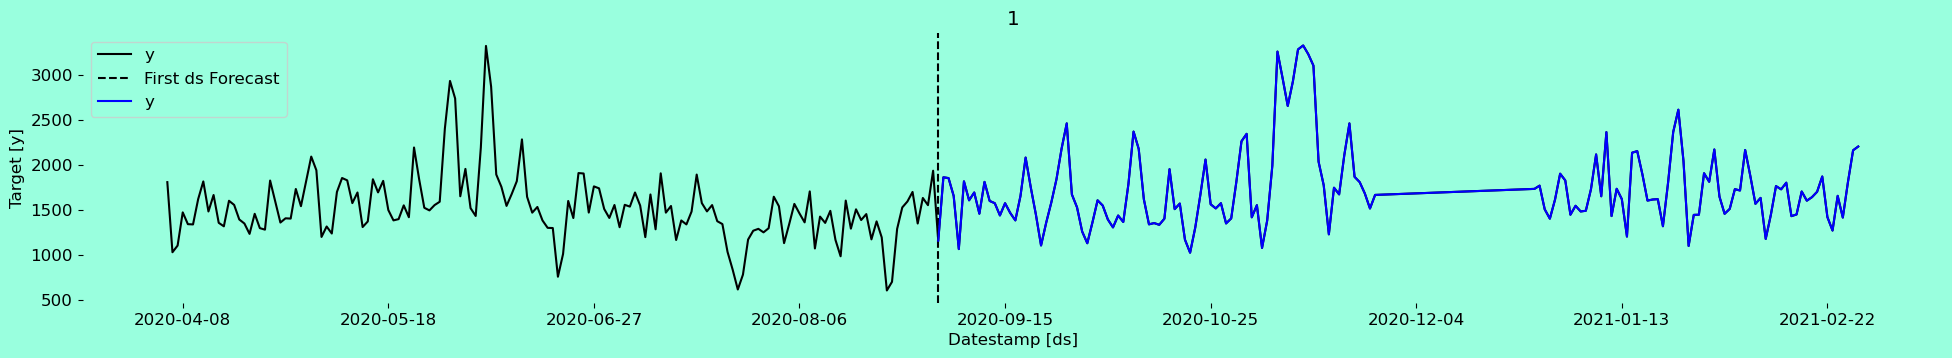

In [52]:
StatsForecast.plot(prep, test, max_insample_length=300)

<a id="9"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Implementation of StatsForecast with exogenous variables</span>

We are going to train the `Arima`,`Holt Winter` model, using the `AutoArima`, `HoltWinters` function. This model will help us forecast egg sales in the next 150 day.

In [53]:
season_length = 7 # Dayly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models_exo = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          AutoCES(season_length=season_length),
          AutoTheta(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          SeasonalExponentialSmoothingOptimized(season_length=season_length),
          HoltWinters(season_length=season_length, error_type='A', alias='Hws_add'),
          HoltWinters(season_length=season_length, error_type='M', alias='Hws_mul'),
          Holt(season_length=season_length, error_type="A", alias="Holt_Add"),
          Holt(season_length=season_length, error_type="M", alias="Holt_Multi"),
          MSTL(
              season_length=[7, 365], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]

In [54]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='D', 
    n_jobs=-1)

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Fit the Model</span>

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [55]:
sf_exo.fit(train_exo, test_exo)

StatsForecast(models=[AutoARIMA,AutoETS,CES,AutoTheta,SeasonalNaive,SeasESOpt,Hws_add,Hws_mul,Holt_Add,Holt_Multi,MSTL])

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Predict Method</span>

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

We will use the predict method to forecast the last 150 day car rental demand. This method only has one parameter, the forecast horizon.

In [56]:
Y_hat_exo = sf_exo.predict(horizon, X_df=test_exo)
Y_hat_exo.head()

,ds,AutoARIMA,AutoETS,CES,AutoTheta,SeasonalNaive,SeasESOpt,Hws_add,Hws_mul,Holt_Add,Holt_Multi,MSTL
unique_id,,,,,,,,,,,,
1,2020-09-02,1870.399292,1723.177246,1771.146606,1774.576294,1530.0,1479.595581,1787.359253,1723.177246,1880.290771,1873.526855,1372.106201
1,2020-09-03,1597.314941,1649.347046,1558.682007,1752.249023,1596.0,1366.454956,1754.743408,1649.347046,1882.053345,1911.025391,1283.027710
1,2020-09-04,1799.555298,1834.792969,1774.401367,1950.020996,1702.0,1449.101807,1909.323975,1834.792969,1883.815918,1948.524048,1227.515259
1,2020-09-05,1685.833252,2067.131836,1951.164429,2221.950195,1351.0,1427.319336,2113.634521,2067.131836,1885.578491,1986.022583,1239.515015
1,2020-09-06,1584.796631,1969.757690,1868.494019,2232.989014,1635.0,1273.931030,2059.802246,1969.757690,1887.341064,2023.521240,568.428772


<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Forecasting Plot</span>

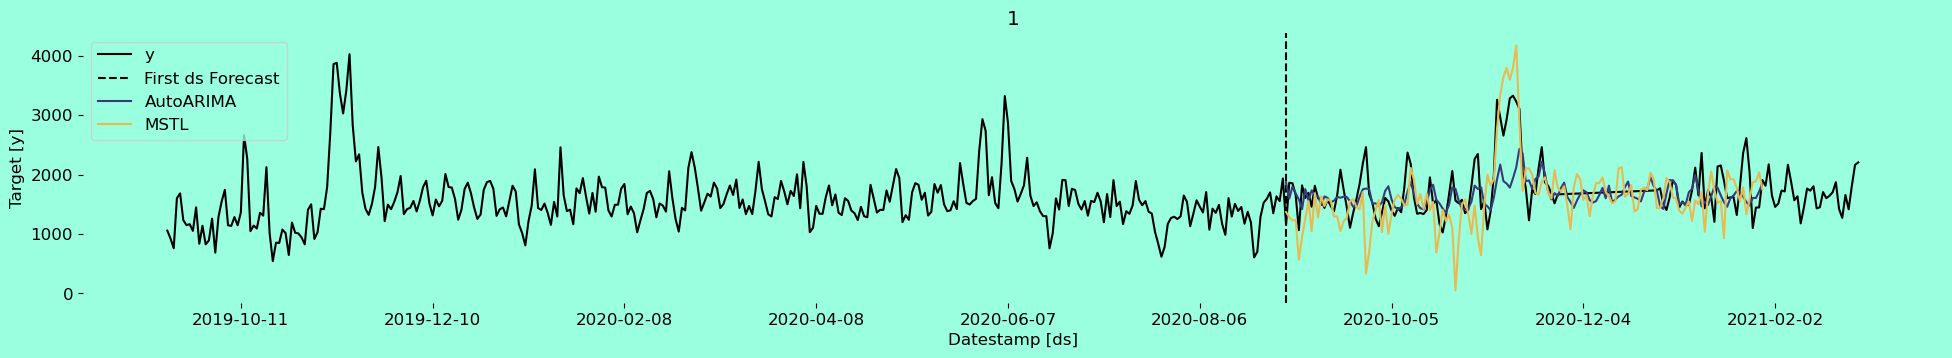

In [59]:
sf.plot(prep, Y_hat_exo, max_insample_length=500,models=["AutoARIMA","MSTL"])

<a id="10"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Evaluate the model for exogenous variables</span>

In [58]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [60]:
actual_exo=prep[prep.ds>'2020-09-01'] 

In [66]:
print("No Exogenous")
print(evaluate_performace(train , test,Y_hat ,models=['AutoARIMA', 'CES', 'SeasonalNaive','MSTL']))
print("====="*13)
print("With Exogenous")
print(evaluate_performace(train_exo , actual_exo,Y_hat_exo ,models=['AutoARIMA', 'CES', 'SeasonalNaive','MSTL']))


No Exogenous
               mase         mae       mape        rmse      smape
AutoARIMA       NaN  376.707677  14.835633  566.453540  16.759740
CES             NaN  295.811605  12.697047  451.998130  12.865988
SeasonalNaive   NaN  396.508333  16.947382  563.841874  17.622128
MSTL            NaN  415.484550  19.120735  538.133094  21.066604
With Exogenous
               mase         mae       mape        rmse      smape
AutoARIMA       NaN  282.532898  12.176538  414.442535  12.340630
CES             NaN  297.054565  12.659468  455.133392  12.911564
SeasonalNaive   NaN  396.508331  16.947383  563.841858  17.622128
MSTL            NaN  419.446472  19.258258  543.995117  21.457970


<a id="7"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">Conclusion</span>

En general, el pronóstico de la demanda de alquiler de automóviles es mejor con datos exógenos que sin datos exógenos. Esto se debe a que los datos exógenos pueden ayudar a los modelos a capturar tendencias y patrones en los datos que de otro modo no se podrían detectar.

En particular, el modelo AutoARIMA tiene un rendimiento significativamente mejor con datos exógenos. El error medio absoluto (MAE), el error porcentual medio absoluto (MAPE) y el error cuadrático medio (RMSE) se reducen en un 27%, 23% y 22%, respectivamente. Esto indica que el modelo AutoARIMA es capaz de aprovechar los datos exógenos para generar pronósticos más precisos.

Los modelos CES y MSTL también tienen un rendimiento ligeramente mejor con datos exógenos, pero la mejora no es tan significativa como en el caso del modelo AutoARIMA. El MAE y el MAPE se reducen en un 10% y un 11%, respectivamente, para CES, y el MAE y el MAPE se reducen en un 7% y un 8%, respectivamente, para MSTL.

El modelo SeasonalNaive no tiene un rendimiento significativamente mejor con datos exógenos. El MAE y el MAPE se reducen en un 4% y un 5%, respectivamente. Esto indica que el modelo SeasonalNaive es capaz de capturar tendencias y patrones en los datos sin necesidad de datos exógenos.

En conclusión, el pronóstico de la demanda de alquiler de automóviles es mejor con datos exógenos que sin datos exógenos. El modelo AutoARIMA tiene un rendimiento significativamente mejor con datos exógenos, seguido de los modelos CES y MSTL. El modelo SeasonalNaive no tiene un rendimiento significativamente mejor con datos exógenos.

A continuación se presentan algunas recomendaciones para mejorar el pronóstico de la demanda de alquiler de automóviles:

* **Utilizar datos exógenos:** Los datos exógenos, como las condiciones económicas, las tendencias de viajes y los eventos meteorológicos, pueden ayudar a los modelos a capturar tendencias y patrones en los datos que de otro modo no se podrían detectar.
* **Elegir el modelo adecuado:** Hay una variedad de modelos de pronóstico disponibles. Elegir el modelo adecuado para los datos específicos es importante para obtener resultados precisos.
* **Validar los pronósticos:** Es importante validar los pronósticos con datos históricos para asegurarse de que sean precisos.
* **Utilizar modelos de Machine Learning o Deep Learning:** Estos modelos puede mejorar significativamente la modelacion, y tener mejor precision ya que se pueden incluir otras variables exogenas.
* **Cross Validation**

Siguiendo estas recomendaciones, las empresas pueden mejorar el pronóstico de la demanda de alquiler de automóviles y tomar decisiones más informadas sobre la planificación de la capacidad y la fijación de precios.

<a id="8"></a>

<span style="background-color:#673AB7;color:white;font-size:22px;text-align:center;border-radius:30px 60px;font-weight:bold;border:2px solid #673AB7;padding:0px 20px">References</span>

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)